**Import libraries and data**

In [1]:
from matplotlib import interactive
interactive(True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('health care diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Exploration:
### 1. Perform descriptive analysis. Understand the variables and their corresponding values. 
Check for a value of zero of the following features:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI  
A zero value does not make sense and it will indicate missing values.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Check for duplicated values:
df.duplicated().sum()

0

In [9]:
# Save the name of columns with 0 value in list:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [10]:
# replace 0 with the mean of the column in 'Glucose','BloodPressure','SkinThickness','Insulin','BMI'
for col in cols:
    df[col].replace(0, int(df[col].mean()),inplace=True)

In [11]:
#Check to see if the changes were made
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.436589,0.471876,33.240885,0.348958
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.877335,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Visually explore these variables using histograms.

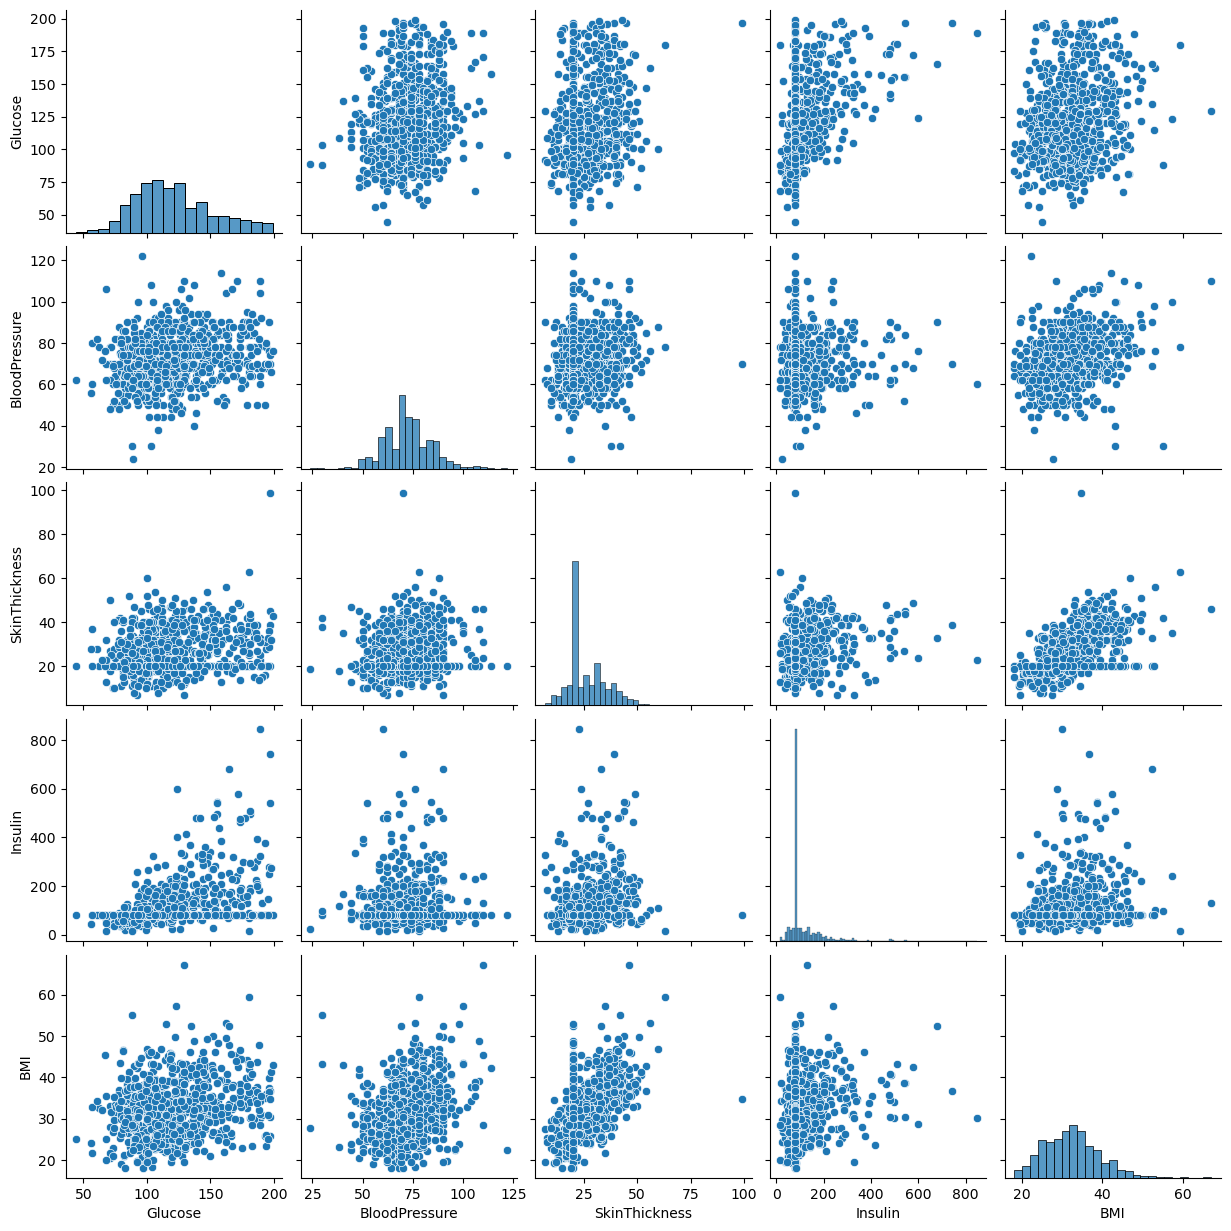

In [12]:
# Histograms and correlation plot
sns.pairplot(data=df,vars=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])
# It can be noticed a positive correlation between BMI and SkinThickness 
# and also almost a normal distribution for BloodPressure feature

### 3. Variables data type check
There are integer and float data type variables in this dataset. 
A frequency plot will be created to emphasize the data types and the count of variables. 

In [13]:
# check the datatype of the var:
# df.info()
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

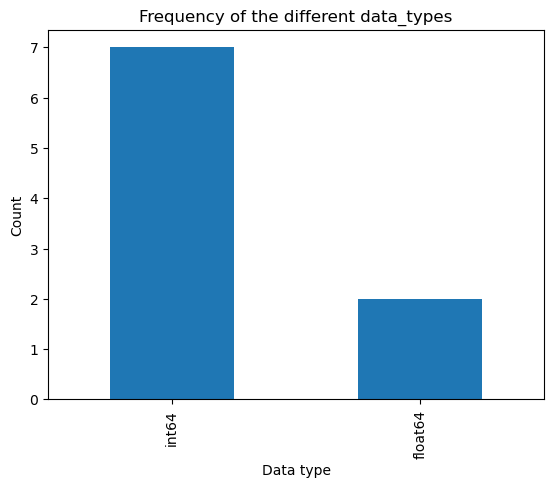

In [15]:
df.dtypes.value_counts().plot(kind='bar');
plt.title("Frequency of the different data_types");
plt.xlabel('Data type');
plt.ylabel('Count');
plt.show()

### 4. Check the balance of the data by plotting the count of outcomes by their value. 

In [16]:
df['Outcome'].value_counts()
#unbalanced data set

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

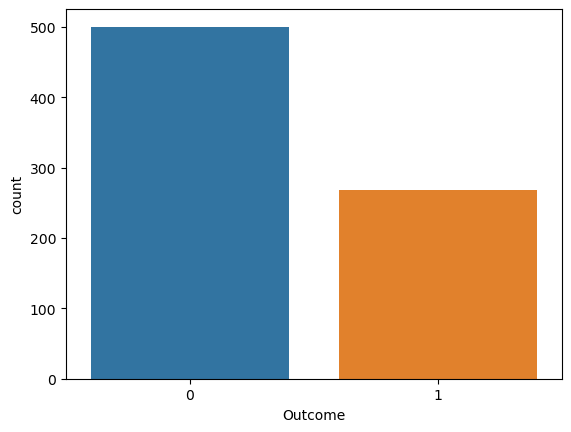

In [17]:
# check the balance visually
sns.countplot(x=df["Outcome"])

In [18]:
# since the data set is unbalanced at confusion matrix
# we should follow precision and recall metrics not the overall accuracy.

### 5. Create scatter charts between the pair of variables to understand the relationships. 

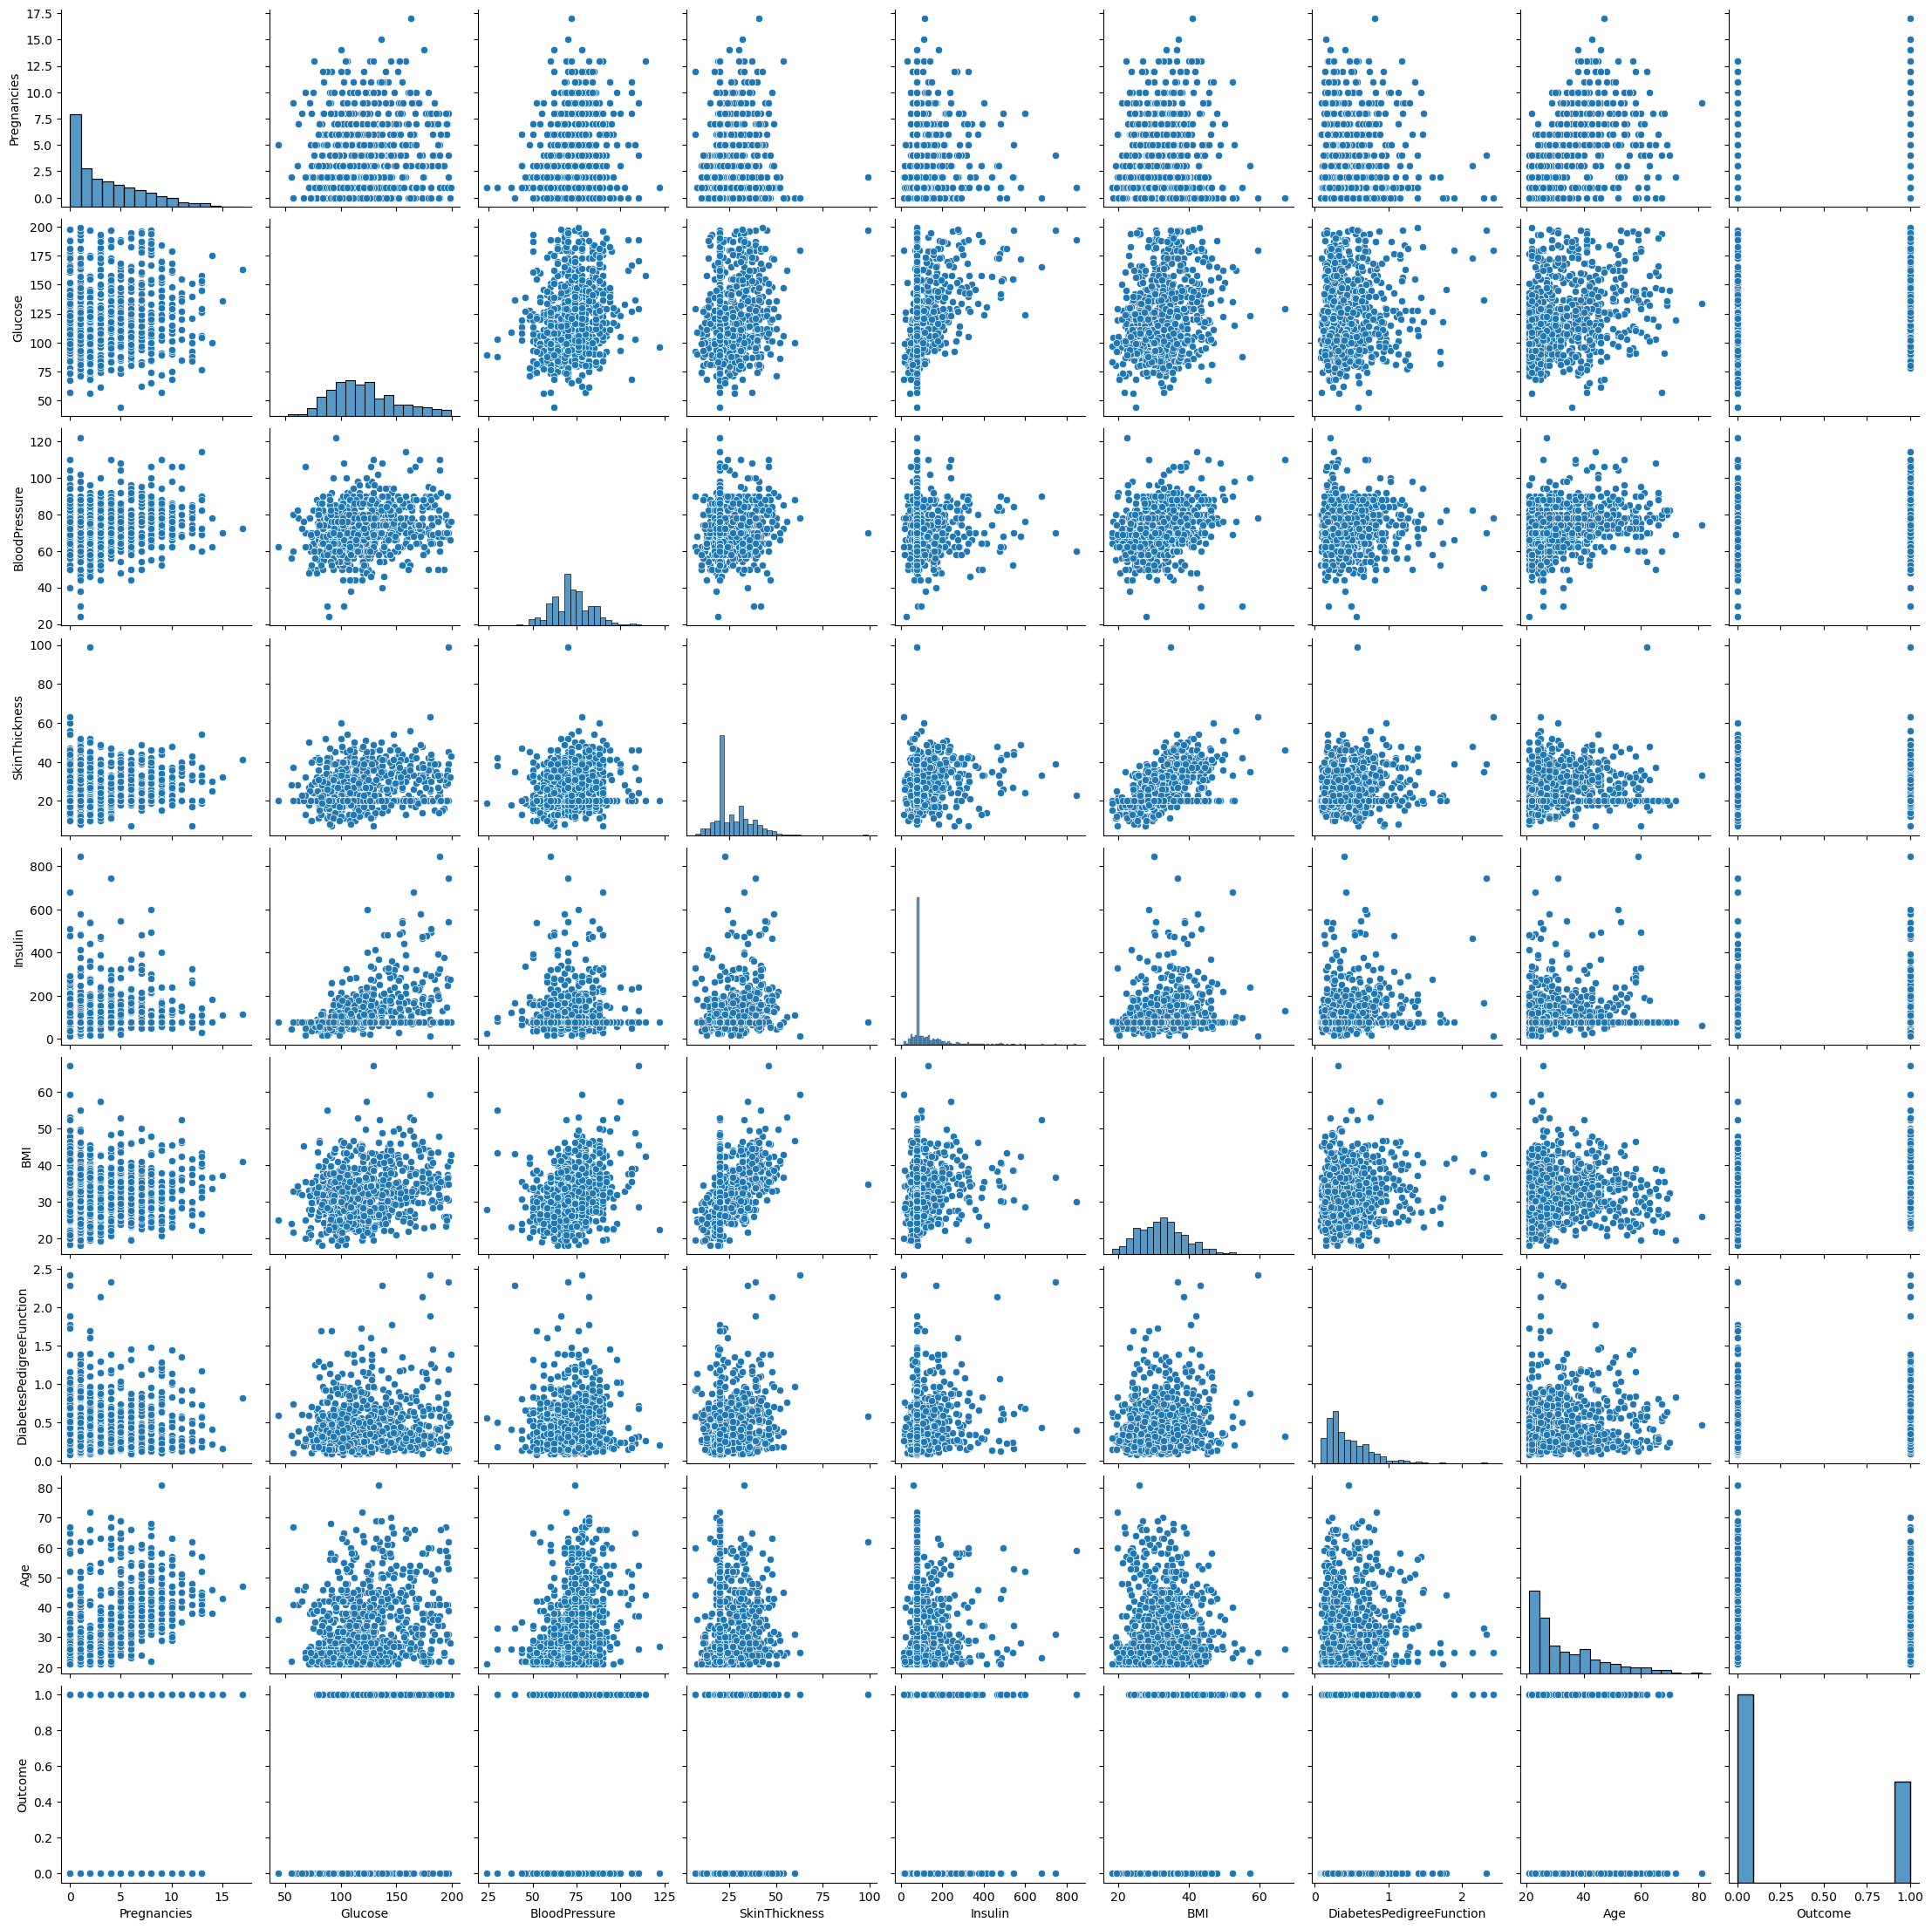

In [19]:
sns.pairplot(df)
#Observe the correlation between different variables and observe that the outcome is a categorical variable

### 6. Perform correlation analysis to visually explore it using a heat map.

In [20]:
#check the correlation coeff
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.021500,-0.033523,0.544341,0.221898
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.232581,0.137158,0.266673,0.492884
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.281060,0.000471,0.326791,0.162879
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.533655,0.157196,0.020582,0.171857
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.190717,0.158243,0.037676,0.178696
BMI,0.021500,0.232581,0.281060,0.533655,0.190717,1.000000,0.153705,0.026231,0.312890
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.153705,1.000000,0.033561,0.173844
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.026231,0.033561,1.000000,0.238356
Outcome,0.221898,0.492884,0.162879,0.171857,0.178696,0.312890,0.173844,0.238356,1.000000


<AxesSubplot:>

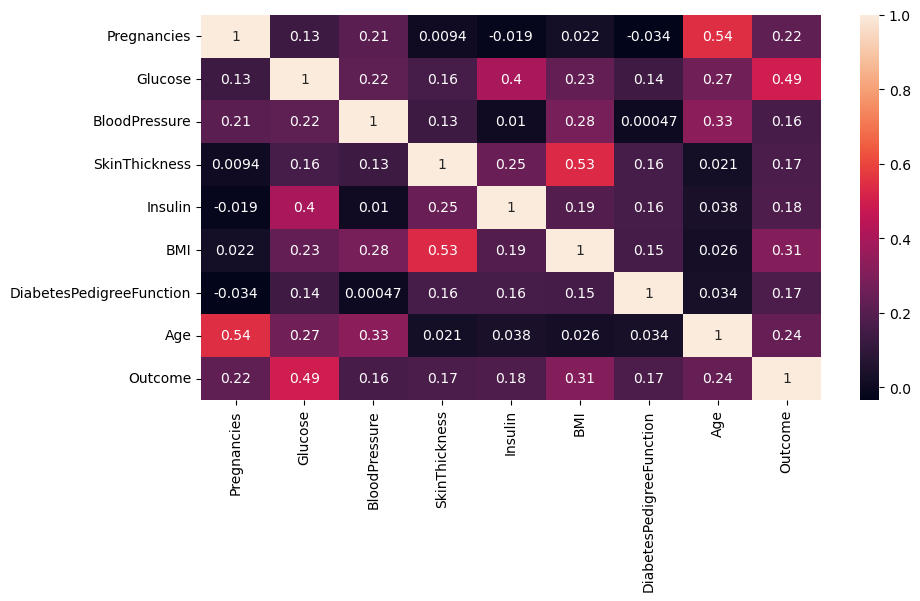

In [21]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True)
# The Outcome has a positive correlation with the Glucose

In [22]:
m = np.ones_like(df.corr())
m

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [23]:
m[np.tril_indices_from(m)]=0

In [24]:
m

array([[0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

<AxesSubplot:>

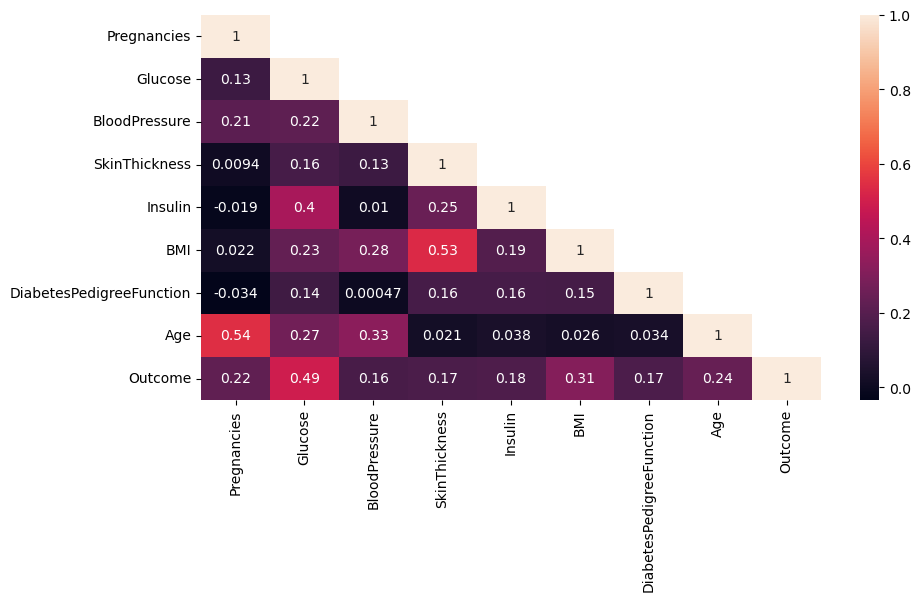

In [25]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True,mask=m)
# data will not be shown in cells where mask is True (is equal to 1)

**save the dataframe to csv file**

In [ ]:
# df.to_csv('P2_output.csv')

## Data Modeling:
An appropriate classification algorithm will be built.
Also, various models will be compared with the results from KNN algorithm.

Obs:<br>
    1. Data modelling is for the prediction of a binary Outcome. Value can be either 0 or 1.<br>
    2. A supervised ML classification algorithm can be used.<br>
    3. Logistic regression needs to checked, since it is good for binary classification.<br>
    4. Tree based algorithms, also needs to be tried out, since the dataset has outliers.<br>

In [26]:
# features
X=df.drop(['Outcome'],axis=1)

In [27]:
#label
y=df['Outcome']

In [28]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=2000)

In [30]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [31]:
y_predict_lr=lr.predict(X_test)

In [32]:
lr.score(X_train,y_train)

0.7635009310986964

In [33]:
lr.score(X_test,y_test)

0.8051948051948052

### Decission Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
#create model object,split and fit the data
dt = DecisionTreeClassifier(criterion='gini',max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
y_predict_dt=dt.predict(X_test)

In [37]:
dt.score(X_train,y_train)

0.7690875232774674

In [38]:
dt.score(X_test,y_test)

0.7965367965367965

### Naive Bayes 

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
# Create a model object
gnb = GaussianNB()

In [41]:
gnb.fit(X_train,y_train)
y_predict_gnb=gnb.predict(X_test)

In [42]:
gnb.score(X_train,y_train)

0.7411545623836127

In [43]:
gnb.score(X_test,y_test)

0.7748917748917749

### KNN

In [52]:
# To decide the value of k, a for loop will be used having k = unique total label count to 20
import warnings
warnings.filterwarnings("ignore")

In [53]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(2,20):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train,y_train)
    accuracy_train=knn.score(X_train,y_train)
    accuracy_test=knn.score(X_test,y_test)
#     for not being overfitted model we use:
#     if (accuracy_test>accuracy_train)
    if accuracy_test>accuracy_train:
#         print (k)
        print('For k = {} Accuracy_train= {:.3f} %  Accuracy_test= {:.3f} %'.format(k,accuracy_train,accuracy_test))


For k = 12 Accuracy_train= 0.773 %  Accuracy_test= 0.775 %
For k = 13 Accuracy_train= 0.762 %  Accuracy_test= 0.779 %
For k = 14 Accuracy_train= 0.762 %  Accuracy_test= 0.779 %
For k = 15 Accuracy_train= 0.758 %  Accuracy_test= 0.766 %
For k = 16 Accuracy_train= 0.754 %  Accuracy_test= 0.779 %
For k = 17 Accuracy_train= 0.749 %  Accuracy_test= 0.775 %
For k = 18 Accuracy_train= 0.745 %  Accuracy_test= 0.758 %
For k = 19 Accuracy_train= 0.745 %  Accuracy_test= 0.762 %


In [54]:
# choose k=13
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=13)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [55]:
y_predict_knn=modelKNN.predict(X_test)

In [56]:
modelKNN.score(X_train,y_train)

0.7616387337057728

In [57]:
modelKNN.score(X_test,y_test)

0.7792207792207793

#### Comparing the above results some conclusions can be drawn:<br>
    - for all the applied algorithms the models are generalized, test_score being higher than the train_score and higher 
    than 77%;
    - the highest test_score is obtained in case of logistic regression algorithm (80.5%), followed by the DT with 79.6%;
    - the lowest value for the test_score is obtained using the Naive Bayse algorithm (77.48%), 
    with a very close value (77.92%) resulting from KNN algorithm;
    - since we are talking about an unbalanced data set (0--> 500; 1--> 268), the more appropiate values to be analyzed are
    Precission and Recall, not the overall accuracy.

### Classification Metrics

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

**For logistic Regression**

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
mat = confusion_matrix(y_true=y_test, y_pred = y_predict_lr)
mat

array([[135,  17],
       [ 28,  51]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted')

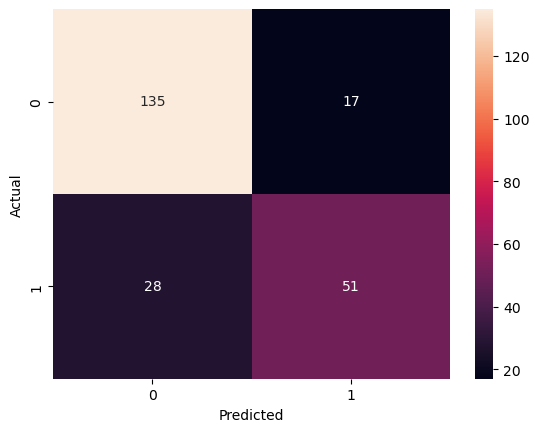

In [60]:
sns.heatmap(mat,annot=True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
# fmt='d', means format of the annotation is integer

In [61]:
from sklearn.metrics import classification_report
report_lr=classification_report(y_true = y_test, y_pred = y_predict_lr,output_dict=True)
report_lr

{'0': {'precision': 0.8282208588957055,
  'recall': 0.8881578947368421,
  'f1-score': 0.8571428571428571,
  'support': 152},
 '1': {'precision': 0.75,
  'recall': 0.6455696202531646,
  'f1-score': 0.6938775510204083,
  'support': 79},
 'accuracy': 0.8051948051948052,
 'macro avg': {'precision': 0.7891104294478528,
  'recall': 0.7668637574950034,
  'f1-score': 0.7755102040816326,
  'support': 231},
 'weighted avg': {'precision': 0.8014700023902478,
  'recall': 0.8051948051948052,
  'f1-score': 0.8013075360014136,
  'support': 231}}

There are 2 values for Precision (Precision for 0 and for 1) and 2 values for Recall.<br>
The question that it need to be answered is which one to consider. This is where the domain knowledge comes into picture.<br>
**For this given use case, there can exist 2 glitches:**<br>
    - Healthy going into Sick;  
    - Sick going into Healthy.  
Thus, out of these 2 behaviours it needs to be decided which behaviour is not tolerable?  

*Let's assume that Sick going into Healthy is not tolerable!*

In [95]:
# Looking at the confusion matrix the area of focus is where sick was predicted as healthy (the area with no 28)
# So, taking into account the above assumption, we are interested in Precision for 0 and recall for 1.

In [94]:
# convert the dictionary report_lr into a dataframe and transpose (rows into columns)
df_lr = pd.DataFrame(report_lr).transpose()
#take only the first 2 rows of the df_dt dataframe
df_lr=df_lr.iloc[0:2,:]
# create a column with the accuracy
df_lr['accuracy']=lr.score(X_test,y_test)
#rename the index column with the name of the algorithm
df_lr.rename(index={'0':'LogisticRegression - 0'},inplace=True)
df_lr

,precision,recall,f1-score,support,accuracy
LogisticRegression - 0,0.828221,0.888158,0.857143,152.0,0.805195
1,0.750000,0.645570,0.693878,79.0,0.805195


In [63]:
report_dt=classification_report(y_test,y_predict_dt,output_dict=True)
report_dt

{'0': {'precision': 0.8387096774193549,
  'recall': 0.8552631578947368,
  'f1-score': 0.8469055374592834,
  'support': 152},
 '1': {'precision': 0.7105263157894737,
  'recall': 0.6835443037974683,
  'f1-score': 0.6967741935483872,
  'support': 79},
 'accuracy': 0.7965367965367965,
 'macro avg': {'precision': 0.7746179966044142,
  'recall': 0.7694037308461026,
  'f1-score': 0.7718398655038353,
  'support': 231},
 'weighted avg': {'precision': 0.7948720775545903,
  'recall': 0.7965367965367965,
  'f1-score': 0.7955619176802324,
  'support': 231}}

In [89]:
# convert the dictionary into a dataframe and transpose (rows into columns)
df_dt = pd.DataFrame(report_dt).transpose()
#take only the first 2 rows of the df_dt dataframe
df_dt=df_dt.iloc[0:2,:]
# create a column with the accuracy
df_dt['accuracy']=dt.score(X_test,y_test)
df_dt.rename(index={'0':'Decision Tree - 0'},inplace=True)
df_dt

,precision,recall,f1-score,support,accuracy
Decision Tree - 0,0.838710,0.855263,0.846906,152.0,0.796537
1,0.710526,0.683544,0.696774,79.0,0.796537


In [90]:
report_gnb=classification_report(y_test,y_predict_gnb,output_dict=True)
df_gnb = pd.DataFrame(report_gnb).transpose()
df_gnb=df_gnb.iloc[0:2,:]
df_gnb['accuracy']=gnb.score(X_test,y_test)
df_gnb.rename(index={'0':'Naive Bayse - 0'},inplace=True)
df_gnb

,precision,recall,f1-score,support,accuracy
Naive Bayse - 0,0.833333,0.822368,0.827815,152.0,0.774892
1,0.666667,0.683544,0.675000,79.0,0.774892


In [91]:
report_knn=classification_report(y_test,y_predict_knn,output_dict=True)
df_knn = pd.DataFrame(report_knn).transpose()
df_knn=df_knn.iloc[0:2,:]
df_knn['accuracy']=modelKNN.score(X_test,y_test)
df_knn.rename(index={'0':'KNN - 0'},inplace=True)
df_knn

,precision,recall,f1-score,support,accuracy
KNN - 0,0.817610,0.855263,0.836013,152.0,0.779221
1,0.694444,0.632911,0.662252,79.0,0.779221


In [96]:
pd.concat([df_lr,df_dt,df_gnb,df_knn])

,precision,recall,f1-score,support,accuracy
LogisticRegression - 0,0.828221,0.888158,0.857143,152.0,0.805195
1,0.750000,0.645570,0.693878,79.0,0.805195
Decision Tree - 0,0.838710,0.855263,0.846906,152.0,0.796537
1,0.710526,0.683544,0.696774,79.0,0.796537
Naive Bayse - 0,0.833333,0.822368,0.827815,152.0,0.774892
1,0.666667,0.683544,0.675000,79.0,0.774892
KNN - 0,0.817610,0.855263,0.836013,152.0,0.779221
1,0.694444,0.632911,0.662252,79.0,0.779221


In [68]:
# accuracy=(TN+TP)/(TN+TP+FP+FN)
# precision=actually positive/out of all the positive predicted cases - go vertically
# recall=correct predicted/out of all the actual positive - go horizontally

In [102]:
# The avg between Precision 0 and Recall 1 for each model is:
LR=(0.8282+0.6455)/2
DT=(0.8387+0.6835)/2
NB=(0.8333+0.6835)/2
KNN=(0.8176+0.6329)/2

In [106]:
results=[LR,DT,NB,KNN]
results

[0.73685, 0.7611, 0.7584, 0.72525]

In [122]:
compare=pd.DataFrame(results, columns=['Avg P0 & R1']).transpose().rename(columns={0:'LR',1:'DT',2:'NB',3:'KNN'})

In [123]:
compare

,LR,DT,NB,KNN
Avg P0 & R1,0.73685,0.7611,0.7584,0.72525


In [ ]:
# If we compare the results using Precision and Recall, not the overall accuracy we can see that the best results are for 
# Decision Tree algorithm, followed by Naive Bayse and Logistic Regression.

**For Logistic Regression** ----- *ROC_AUC curve - visualization metrics*

*ROC always expect your data to beof high quality with less bias. If the ROC goes, at any point, below the skill line,
we REJECT Model.* <br>  
*2 conditions* have to be accomplished in order for the model to be a valid one:  
    - AUC (Area Under Curve) should be >= CL (Confidence Level)  
    - ROC must be valid (never go below the skill line).

In [221]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve,auc

In [211]:
# Predict Probability- predict_proba
# first column is the probability of being 0 and the second column is the probability of being 1
# (by default threshold=0.5, if p>0.5 than the predicted value is 1)
prob = lr.predict_proba(X_test)
prob[:5,:]

array([[0.86882406, 0.13117594],
       [0.93792889, 0.06207111],
       [0.90607193, 0.09392807],
       [0.59630899, 0.40369101],
       [0.74063881, 0.25936119]])

In [212]:
prob_0 = prob[:, 0]
prob_1 = prob[:, 1]

In [213]:
# For a balanced data set the appropriate visualization metric to be used is ROC AUC curve

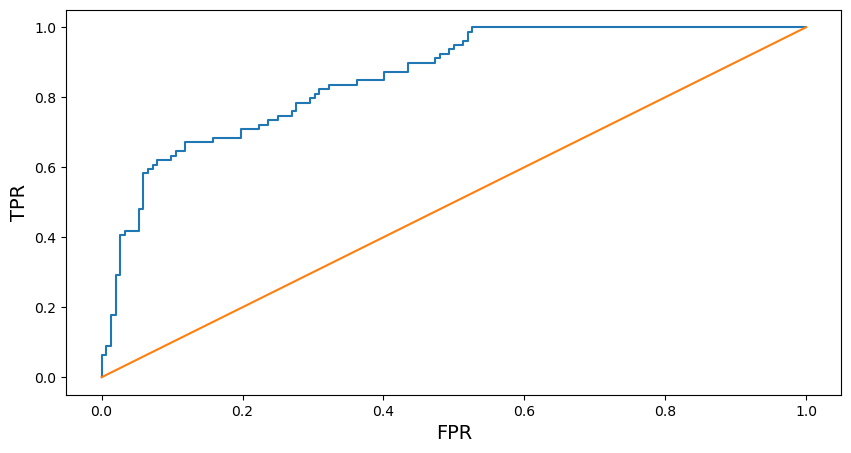

In [214]:
#ROC AUC curve
fpr, tpr, threshold = roc_curve(y_true = y_test, y_score = prob_1, pos_label=1)
plt.figure(figsize = (10,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR', size = 14)
plt.ylabel('TPR', size = 14)
plt.show()

In [215]:
# The score is:
auc=roc_auc_score(y_true = y_test, y_score = prob_1)
auc

0.8566788807461693

In [216]:
#For this example use of ROC is invalid since the dataset is an UNBALANCED dataset.

In [217]:
# For an unbalanced data set (how it is the case here) the appropriate visualization metric to be used is PR AUC curve

In [218]:
precision, recall, thresholds=precision_recall_curve(y_true = y_test, probas_pred= prob_1)

Text(0, 0.5, 'Precision')

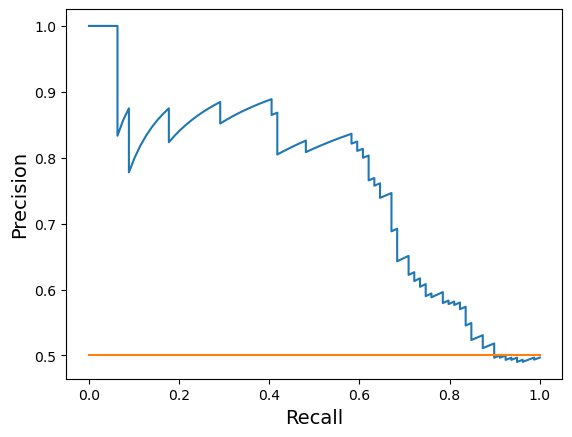

In [219]:
plt.plot(recall,precision)
plt.plot([0,1],[0.5,0.5]) #skill line
plt.xlabel('Recall', size = 14)
plt.ylabel('Precision', size = 14)

In [222]:
aucPR = auc(recall,precision)
print(aucPR)

0.754724100323755


#### The PR auc line(blue) is below the skill line(orange), at some moment, which means we reject the model!
For this PR AUC curve we considered the Logistic Regression model, but, with any of the models the PR AUC line will
go, at some point, below the skill line.
This is the reason for which it is more recommended to use numerical metrics instead of visualization metrics.